<a href="https://colab.research.google.com/github/SMJ2003-pocketware/Data-Science/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading various libraries and dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Loading and reading the csv file

In [ ]:
titanic_data=pd.read_csv('/content/Titanic-Dataset.csv')

Getting infromations and description about the dataset

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the number of missing values in each column

In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling missing values

In [ ]:
#to handle the missing age value, we fill it with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

<ipython-input-108-3a9baa4ef233>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)


In [ ]:
#dropping the cabin column due to too many missing values
titanic_data.drop(columns='Cabin',inplace=True)

In [ ]:
#finding the most frequent value in embark column and filling the missing values in the column with the mode value
titanic_data['Embarked'].mode()

,Embarked
0,S


In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

<ipython-input-111-f0a3534fad3e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)


In [ ]:
#after data handling checking again if all the missing values have been dealt with
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Encoding categorical columns

In [ ]:
# Convert sex to numerical value (0 for female, 1 for male)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})

In [ ]:
#convert embarked to numerical value
embarked_dummies = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
titanic_data = pd.concat([titanic_data, embarked_dummies], axis=1)
titanic_data.drop('Embarked', axis=1, inplace=True)

Data Analysis

In [ ]:
#survival count
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


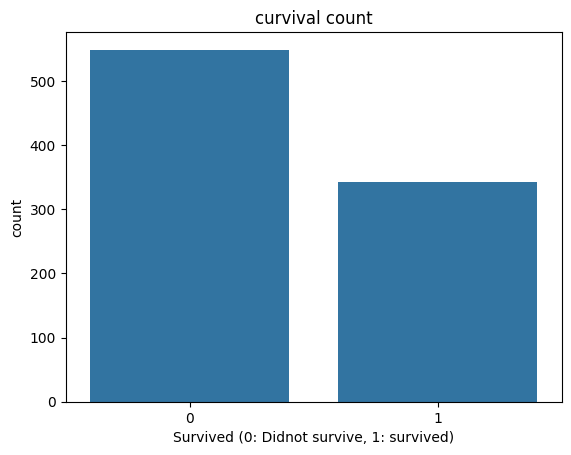

In [ ]:
#graph for the survival count
sns.countplot(x='Survived',data=titanic_data)
plt.title('curvival count')
plt.xlabel('Survived (0: Didnot survive, 1: survived)')
plt.ylabel('count')
plt.show()

In [ ]:
#survival count based on gender
titanic_data['Sex'].value_counts()

,count
Sex,
1,577
0,314


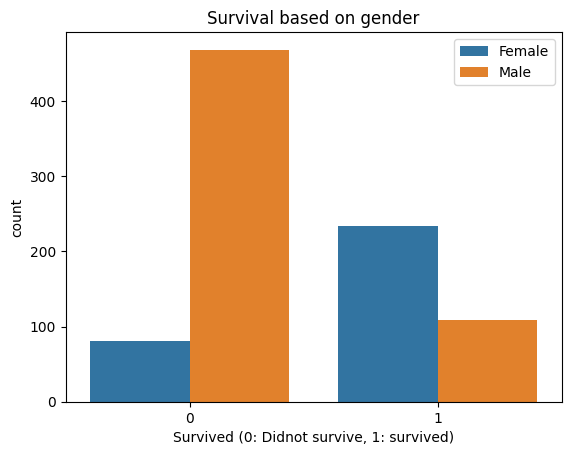

In [ ]:
#graph for the survival count based on gender
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
plt.title('Survival based on gender')
plt.xlabel('Survived (0: Didnot survive, 1: survived)')
plt.ylabel('count')
plt.legend(['Female','Male'])
plt.show()

In [ ]:
#survival count based on passenger class
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


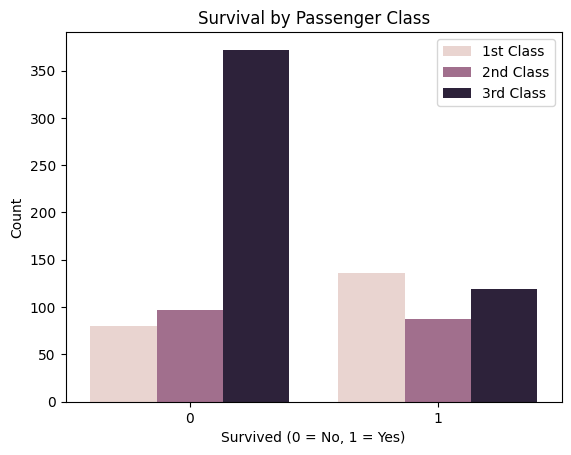

In [ ]:
#graph for the survival count based on passenger class
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

Splitting the data

In [ ]:
#separing the features and target
x=titanic_data.drop(['Survived','Name','Ticket'],axis=1)
y=titanic_data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Model building
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#calculating the predictions
y_pred=model.predict(x_test)

In [ ]:
#Evaluation of the accuracy on training data
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8268156424581006
